In [1]:
import pandas as pd
from os import listdir

In [2]:
for file in sorted(listdir('.')): #nos uqedamos con el mas grande en caso de actualizar el ds
    if 'ds_balanced' in file:
        print(file)
        df_name = file
        
print('selected: ', df_name)

ds_balanced_795.csv
selected:  ds_balanced_795.csv


In [3]:
df = pd.read_csv(df_name)
pd.set_option('display.max_colwidth', 200)
print(df.columns)
df[['title', 'content']].head()

Index(['id', 'title', 'content', 'category'], dtype='object')


,title,content
0,ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19,"ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19. La vacuna contra el Covid-19 no pone fin a la devastación causada por la pandemia en el mundo, alertó el jueves el j..."
1,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus. Once millones de niñas en todo el mundo corren el riesgo de no volver a la escuela cuando terminen las r...
2,Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas,"Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas. El ministro de Relaciones Exteriores de Brasil, Ernesto Araújo , presentó este lunes su renuncia, tras fuert..."
3,Viajes en un mundo posterior a la pandemia del coronavirus,Viajes en un mundo posterior a la pandemia del coronavirus. Se espera un enfriamiento del romance con las capitales europeas y que exista un nuevo cariño por las ciudades menos pobladas con grande...
4,Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años,"Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años. El opositor Wavel Ramkalawan se convirtió este domingo, con un 54,9% de los votos, en el quinto pr..."


In [4]:
MAX_LEN = 600
DROPOUT = 0.5
MAX_VOCAB_SIZE = 50000
RANDOM_STATE = 42
BATCH_SIZE = 32
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [2, 3, 4]
# segun lo que probe mas de 5 overfitea 
N_EPOCHS = 5

## Truncar contenido
### Cuanto?

In [5]:
df['content'] = df.content.str.slice(0, MAX_LEN)
print('min len: ', df.content.map(len).min())
print('max len: ', df.content.map(len).max())

min len:  187
max len:  600


In [6]:
df

,id,title,content,category
0,5708146,ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19,"ONU advierte que la vacuna no basta para enfrentar la devastación del Covid-19. La vacuna contra el Covid-19 no pone fin a la devastación causada por la pandemia en el mundo, alertó el jueves el j...",1-Mundo
1,6664788,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus,11 millones de niñas en el mundo corren el riesgo de no volver a clases por el coronavirus. Once millones de niñas en todo el mundo corren el riesgo de no volver a la escuela cuando terminen las r...,1-Mundo
2,14776151,Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas,"Canciller de Brasil presenta su renuncia tras presiones de legisladores bolsonaristas. El ministro de Relaciones Exteriores de Brasil, Ernesto Araújo , presentó este lunes su renuncia, tras fuert...",1-Mundo
3,5742144,Viajes en un mundo posterior a la pandemia del coronavirus,Viajes en un mundo posterior a la pandemia del coronavirus. Se espera un enfriamiento del romance con las capitales europeas y que exista un nuevo cariño por las ciudades menos pobladas con grande...,1-Mundo
4,14798264,Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años,"Oposición gana las elecciones presidenciales en las islas Seychelles por primera vez en 40 años. El opositor Wavel Ramkalawan se convirtió este domingo, con un 54,9% de los votos, en el quinto pr...",1-Mundo
...,...,...,...,...
7945,5815421,Inicia juicio histórico para esclarecer “vuelos de la muerte” durante dictadura argentina,"Inicia juicio histórico para esclarecer “vuelos de la muerte” durante dictadura argentina. Los procesos judiciales sobre los llamados “vuelos de la muerte” desde Campo de Mayo, uno de los centros ...",9-Crimen_delitos_y_Justicia
7946,4683781,Caso Corpesca: Fiscalía pide 11 años de cárcel para Orpis y 818 días de presidio para Isasi,Caso Corpesca: Fiscalía pide 11 años de cárcel para Orpis y 818 días de presidio para Isasi. Luego de que ayer el Tercer Tribunal Oral en lo Penal de Santiago entregara el veredicto en el caso Cor...,9-Crimen_delitos_y_Justicia
7947,13490868,Contraloría denuncia irregularidades en compra de terreno de $9.800 millones por parte de la Intendencia de Coquimbo,Contraloría denuncia irregularidades en compra de terreno de $9.800 millones por parte de la Intendencia de Coquimbo. La Contraloría General de la República denunció un presunto caso de fraude al...,9-Crimen_delitos_y_Justicia
7948,4060291,Se imputarán 109 cargos: PDI detiene a 12 personas por daños causados en la Universidad de Concepción,"Se imputarán 109 cargos: PDI detiene a 12 personas por daños causados en la Universidad de Concepción. Este lunes, la Policía de Investigaciones (PDI) de Concepción detuvo a 12 hombres por su pres...",9-Crimen_delitos_y_Justicia


In [7]:
RANDOM_STATE = 42
from sklearn.utils import shuffle
df = shuffle(df, random_state=RANDOM_STATE)

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.45, random_state=RANDOM_STATE)
for train_index, test_valid_index in split.split(df, df.category):
    train = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=RANDOM_STATE)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.category):
    test = test_valid_set.iloc[test_index]
    valid = test_valid_set.iloc[valid_index]


#valid, test, train = np.split(df, [ int(.15*len(df)), int(.3*len(df))] )

In [9]:
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(7950, 4)
(4372, 4)
(2684, 4)
(894, 4)


In [10]:
display(train.groupby(['category']).size())
display(valid.groupby(['category']).size())
display(test.groupby(['category']).size())

category
1-Mundo                        437
10-Salud                       438
2-Economía                     437
3-Política_y_Conflictos        437
4-Ciencias_y_Tecnología        437
5-Catástrofes_y_Accidentes     437
6-Cultura_y_Artes              437
7-Deporte                      437
8-Ecología_y_Planeta           438
9-Crimen_delitos_y_Justicia    437
dtype: int64

category
1-Mundo                        268
10-Salud                       268
2-Economía                     268
3-Política_y_Conflictos        269
4-Ciencias_y_Tecnología        269
5-Catástrofes_y_Accidentes     269
6-Cultura_y_Artes              268
7-Deporte                      269
8-Ecología_y_Planeta           268
9-Crimen_delitos_y_Justicia    268
dtype: int64

category
1-Mundo                        90
10-Salud                       89
2-Economía                     90
3-Política_y_Conflictos        89
4-Ciencias_y_Tecnología        89
5-Catástrofes_y_Accidentes     89
6-Cultura_y_Artes              90
7-Deporte                      89
8-Ecología_y_Planeta           89
9-Crimen_delitos_y_Justicia    90
dtype: int64

In [11]:
test.category.unique()

array(['3-Política_y_Conflictos', '1-Mundo', '5-Catástrofes_y_Accidentes',
       '10-Salud', '9-Crimen_delitos_y_Justicia',
       '4-Ciencias_y_Tecnología', '8-Ecología_y_Planeta', '2-Economía',
       '7-Deporte', '6-Cultura_y_Artes'], dtype=object)

In [12]:
train.to_csv("CNN_train.csv", encoding="UTF-8",index=False)
valid.to_csv("CNN_valid.csv", encoding="UTF-8",index=False)
test.to_csv("CNN_test.csv", encoding="UTF-8",index=False)

In [13]:
import torch
import spacy
import random
import torchtext
from torchtext import data
from torchtext import datasets
from torchtext.legacy import data

In [14]:
spacy_es = spacy.load('es_core_news_sm')

In [15]:
def tokenize_es(sentence):
    return [tok.text for tok in spacy_es.tokenizer(sentence)]

In [16]:
TEXT = data.Field(tokenize=tokenize_es, batch_first = True)
CATEGORY = data.LabelField()  # MULTICLASS -se borró el argumento "(dtype = torch.float)"

In [17]:
fields = [(None, None),(None, None),('content', TEXT),('category', CATEGORY)]

In [18]:
import numpy as np

SEED = RANDOM_STATE

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'CNN_train.csv',
                                        validation= 'CNN_valid.csv',
                                        test = 'CNN_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

In [19]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
DEVICE_NAME = str(device)

print(DEVICE_NAME)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                    (train_data, valid_data, test_data), 
                                                    batch_size = BATCH_SIZE, 
                                                    device = device,
                                                    sort_key=lambda x:len(x.category),
                                                    sort_within_batch=False)

cpu


In [20]:
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

In [21]:

## TENER VECTORES EN ESPAÑOL
vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec.gz', cache='.')
TEXT.build_vocab(train_data,
                 vectors=vec,
                 max_size=MAX_VOCAB_SIZE,
                 unk_init=torch.Tensor.normal_)

In [22]:
CATEGORY.build_vocab(train_data)

In [23]:
cat_map = { v: k for k, v in CATEGORY.vocab.stoi.items()}
cat_map

{0: '10-Salud',
 1: '8-Ecología_y_Planeta',
 2: '1-Mundo',
 3: '2-Economía',
 4: '3-Política_y_Conflictos',
 5: '4-Ciencias_y_Tecnología',
 6: '5-Catástrofes_y_Accidentes',
 7: '6-Cultura_y_Artes',
 8: '7-Deporte',
 9: '9-Crimen_delitos_y_Justicia'}

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        #text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        
        return self.fc(cat)

In [25]:
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]
INPUT_DIM = len(TEXT.vocab)
OUTPUT_DIM = len(CATEGORY.vocab) ##### MULTICLASS ---> la dimensión del output no es 1 (clasificación binaria)



model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
model = model.to(device)

In [26]:
OUTPUT_DIM

10

In [27]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 11,022,910 trainable parameters


In [28]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [29]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss() #MULTICLASS ---> en lugar de .BCEWithLogitsLoss() (Binary Cross Entropy)


criterion = criterion.to(device)

In [30]:
OPTIMIZER = type(optimizer).__name__
CRITERION = type(criterion).__name__

In [31]:
from tqdm import tqdm
def train(model, iterator, optimizer, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc='train'):
        
        optimizer.zero_grad()
        
        #print("Tamaño texto de entrada:"+str(batch.body.shape))
        
        predictions = model(batch.content)
        
        #print("Tamaño predecciones de salida:"+str(predictions.shape)) 
        
        #print("Tamaño target:"+str(batch.category.shape)) 
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category, divisor)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [32]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [33]:
def categorical_accuracy(preds, y, divisor):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim=1, keepdim=True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / divisor([y.shape[0]])

In [34]:
def evaluate(model, iterator, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(iterator, desc='eval'):

            predictions = model(batch.content)
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category, divisor)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [35]:
from datetime import datetime
from os import remove
from tqdm import trange

print("inicio optimización")

best_valid_loss = float('inf')
last_best = None
OVERWRITE_MODEL_FILE = True
for epoch in range(N_EPOCHS):

    start_time = time.time()
    divisor = torch.FloatTensor if str(device) == 'cpu' else torch.cuda.FloatTensor
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, divisor)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, divisor)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_epoch = epoch + 1
        dt = str(datetime.now()).replace(' ', '_')
        name = f'./CNN_ep{str(best_epoch)}_{dt}.pt'
        torch.save({'epoca': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'Valid_loss': best_valid_loss}, name)
        if OVERWRITE_MODEL_FILE and last_best is not None:
            remove(last_best)
            last_best = name
        elif OVERWRITE_MODEL_FILE and last_best is None:
            last_best = name
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

inicio optimización


eval: 100%|██████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.18it/s]


Epoch: 01 | Epoch Time: 0m 59s
	Train Loss: 1.693 | Train Acc: 43.36%
	 Val. Loss: 1.008 |  Val. Acc: 70.94%


eval: 100%|██████████████████████████████████████████████████████| 84/84 [00:09<00:00,  9.09it/s]


Epoch: 02 | Epoch Time: 1m 8s
	Train Loss: 0.937 | Train Acc: 69.88%
	 Val. Loss: 0.801 |  Val. Acc: 75.32%


eval: 100%|██████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.03it/s]


Epoch: 03 | Epoch Time: 1m 6s
	Train Loss: 0.638 | Train Acc: 80.05%
	 Val. Loss: 0.718 |  Val. Acc: 77.60%


eval: 100%|██████████████████████████████████████████████████████| 84/84 [00:06<00:00, 12.13it/s]


Epoch: 04 | Epoch Time: 0m 59s
	Train Loss: 0.447 | Train Acc: 87.03%
	 Val. Loss: 0.707 |  Val. Acc: 77.25%


eval: 100%|██████████████████████████████████████████████████████| 84/84 [00:07<00:00, 11.66it/s]


Epoch: 05 | Epoch Time: 0m 56s
	Train Loss: 0.290 | Train Acc: 91.53%
	 Val. Loss: 0.681 |  Val. Acc: 78.91%


In [36]:
name, best_epoch

('./CNN_ep5_2021-11-27_14:51:54.985375.pt', 5)

In [37]:
best_model = CNN(INPUT_DIM,
                 EMBEDDING_DIM,
                 N_FILTERS,
                 FILTER_SIZES,
                 OUTPUT_DIM,
                 DROPOUT,
                 PAD_IDX)

In [38]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [39]:
best_model.load_state_dict(torch.load(name,
                                      map_location=torch.device('cpu'))['model_state_dict'])

<All keys matched successfully>

In [40]:
test_loss, test_acc = evaluate(model, test_iterator, criterion, divisor)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

eval: 100%|██████████████████████████████████████████████████████| 28/28 [00:02<00:00, 11.09it/s]

Test Loss: 0.734 | Test Acc: 76.69%


In [41]:
best_model.eval()
prediction_test = []
labels_test=[]
for batch in tqdm(test_iterator, desc='predictions'):
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.content.cpu()).squeeze(1)
    prediction_test.append(predictions.argmax(dim=1).detach().numpy())
    
y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

predictions: 100%|███████████████████████████████████████████████| 28/28 [00:02<00:00, 11.60it/s]


In [42]:
lbs = list(cat_map.values())
lbs

['10-Salud',
 '8-Ecología_y_Planeta',
 '1-Mundo',
 '2-Economía',
 '3-Política_y_Conflictos',
 '4-Ciencias_y_Tecnología',
 '5-Catástrofes_y_Accidentes',
 '6-Cultura_y_Artes',
 '7-Deporte',
 '9-Crimen_delitos_y_Justicia']

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
print(classification_report(y_true,
                            y_pred,
                            target_names=lbs,))

                             precision    recall  f1-score   support

                   10-Salud       0.75      0.75      0.75        89
       8-Ecología_y_Planeta       0.78      0.80      0.79        89
                    1-Mundo       0.65      0.61      0.63        90
                 2-Economía       0.72      0.76      0.74        90
    3-Política_y_Conflictos       0.65      0.72      0.68        89
    4-Ciencias_y_Tecnología       0.85      0.78      0.81        89
 5-Catástrofes_y_Accidentes       0.76      0.83      0.79        89
          6-Cultura_y_Artes       0.85      0.74      0.79        90
                  7-Deporte       0.95      0.94      0.95        89
9-Crimen_delitos_y_Justicia       0.74      0.74      0.74        90

                   accuracy                           0.77       894
                  macro avg       0.77      0.77      0.77       894
               weighted avg       0.77      0.77      0.77       894



In [44]:
from my_funcs import plot_confusion_matrix

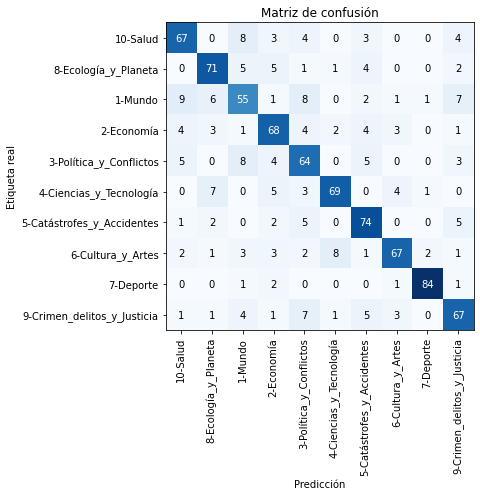

In [45]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm, labels=lbs)

In [46]:
def predict_class(model, sentence, min_len = 4):

    tokenized = [tok.text for tok in spacy_es.tokenizer(sentence)]
    
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    device = 'cpu'
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    preds = model(tensor)
    print(preds)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [47]:
noticia = """Sin embargo, estos experimentos se llevaban a cabo en secreto, y cuando otras secciones de Guardian se dieron cuenta, el proyecto se canceló de inmediato."""
cat_map.get(predict_class(best_model, noticia))

tensor([[-0.1712,  0.1238, -0.8485, -0.6981,  0.7821,  0.5709, -0.4067, -0.1454,
         -0.6241,  0.2092]], grad_fn=<AddmmBackward>)


[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


'3-Política_y_Conflictos'

In [48]:
cat_map.get(predict_class(best_model, "alexis y la copa america le pegoOoOooO"))

tensor([[-0.0806, -0.1635, -0.2103, -0.0508,  0.1259,  0.0322,  0.0483, -0.0006,
          0.0819,  0.0630]], grad_fn=<AddmmBackward>)


'3-Política_y_Conflictos'

In [52]:
noticia = """Artistas mexicanos retoman los espacios públicos a través de la danza. Más de 120 artistas de 16 estados de México se reúnen para dar vida al Encuentro Nacional de Danza 2021. El evento cultural se lleva a cabo en distintos puntos de la capital del país, entre ellos el Complejo Cultural Los Pinos.
"""
cat_map.get(predict_class(best_model, noticia))

tensor([[-0.3944, -1.6880, -1.1622, -2.2263, -0.5505, -0.2036, -2.1914,  4.0160,
         -2.5079, -2.0726]], grad_fn=<AddmmBackward>)


'6-Cultura_y_Artes'

# Comparar hiperparametros

gaurdar parametros utilizados y algunas metricas en tabla resumen

In [49]:
from operator import itemgetter
wanted_keys = ['test_loss', 'test_acc', 'best_valid_loss', 'MAX_LEN', 'DROPOUT', 'N_EPOCHS',
               'best_epoch', 'dt', 'DEVICE_NAME', 'MAX_VOCAB_SIZE', 'RANDOM_STATE', 'BATCH_SIZE', 
               'EMBEDDING_DIM', 'N_FILTERS', 'FILTER_SIZES', 'OPTIMIZER',
               'CRITERION',
              ]
wanted_values = list(itemgetter(*wanted_keys)(globals()))
hparams = dict(zip(wanted_keys, wanted_values))
saved = False
hparams

{'test_loss': 0.733618441436972,
 'test_acc': 0.7668898808104652,
 'best_valid_loss': 0.6809686652961231,
 'MAX_LEN': 600,
 'DROPOUT': 0.5,
 'N_EPOCHS': 5,
 'best_epoch': 5,
 'dt': '2021-11-27_14:51:54.985375',
 'DEVICE_NAME': 'cpu',
 'MAX_VOCAB_SIZE': 50000,
 'RANDOM_STATE': 42,
 'BATCH_SIZE': 32,
 'EMBEDDING_DIM': 300,
 'N_FILTERS': 100,
 'FILTER_SIZES': [2, 3, 4],
 'OPTIMIZER': 'Adam',
 'CRITERION': 'CrossEntropyLoss'}

In [50]:
import pickle
try:
    with open ('./cnn_info', 'rb') as fp:
        attemps = pickle.load(fp)
    if not saved:
        attemps.append(hparams)
        saved = True
except FileNotFoundError:
    print('cnn_info not found...')
    attemps = [hparams]
finally:
    with open('./cnn_info', 'wb') as fp:
        pickle.dump(attemps, fp)

In [53]:
pd.DataFrame(attemps, columns=wanted_keys)

,test_loss,test_acc,best_valid_loss,MAX_LEN,DROPOUT,N_EPOCHS,best_epoch,dt,DEVICE_NAME,MAX_VOCAB_SIZE,RANDOM_STATE,BATCH_SIZE,EMBEDDING_DIM,N_FILTERS,FILTER_SIZES,OPTIMIZER,CRITERION
0,0.642012,0.805506,0.679949,800,0.5,5,2,2021-11-27_12:03:25.328457,cpu,50000,42,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
1,0.647319,0.782738,0.628116,1000,0.5,5,5,2021-11-27_12:42:07.138385,cpu,50000,42,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
2,0.664787,0.775967,0.632048,1000,0.4,5,5,2021-11-27_12:55:15.880132,cpu,50000,42,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
3,0.642821,0.794940,0.606749,1200,0.5,5,5,2021-11-27_13:21:58.449466,cpu,50000,42,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
4,0.676788,0.796057,0.606749,1200,0.5,10,5,2021-11-27_13:35:33.390381,cpu,50000,42,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
5,0.733618,0.766890,0.680969,600,0.5,5,5,2021-11-27_14:51:54.985375,cpu,50000,42,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
